In [10]:
from RsInstrument import *  # The RsInstrument package is hosted on pypi.org, see Readme.txt for more details
from time import time
import matplotlib.pyplot as plt

In [11]:
rtb = RsInstrument('TCPIP::169.254.146.117::INSTR', True, False)
rtb.visa_timeout = 3000  # Timeout for VISA Read Operations
rtb.opc_timeout = 15000  # Timeout for opc-synchronised operations
rtb.instrument_status_checking = True  # Error check after each command

In [12]:
print(f'RTB2000 IDN: {rtb.idn_string}')
print(f'RTB2000 Options: {",".join(rtb.instrument_options)}')

rtb.clear_status()
rtb.reset()

RTB2000 IDN: Rohde&Schwarz,RTB2004,1333.1005k04/102215,01.210
RTB2000 Options: B242


In [13]:
rtb.write_str("TIM:ACQT 0.00001")  # 10ms Acquisition time
rtb.write_str("CHAN1:RANG 10")  # Horizontal range 5V (0.5V/div)
rtb.write_str("CHAN1:OFFS 0.0")  # Offset 0
rtb.write_str("CHAN1:COUP ACL")  # Coupling AC 1MOhm
rtb.write_str("CHAN1:STAT ON")  # Switch Channel 1 ON

In [14]:
rtb.write_str("TRIG:A:MODE NORM")  # Trigger Auto mode in case of no signal is applied
rtb.write_str("TRIG:A:TYPE EDGE;:TRIG:A:EDGE:SLOP POS")  # Trigger type Edge Positive
rtb.write_str("TRIG:A:SOUR CH1")  # Trigger source CH1
rtb.write_str("TRIG:A:LEV1 1")  # Trigger level 0.05V
rtb.query_opc()  # Using *OPC? query waits until all the instrument settings are finished

True

In [20]:
rtb.write_str("SYSTem:COMMunicate:INTerface:ETHernet:TRANsfer FD100")
rtb.write_str("CHAN1:TYPE HRES")

In [21]:
rtb.VisaTimeout = 2000  # Acquisition timeout - set it higher than the acquisition time
rtb.write_str("RUNContinous")

In [22]:
rtb.query_opc()  # Using *OPC? query waits until the instrument finished the Acquisition

True

In [24]:
rtb.data_chunk_size = 1000000
traces = []
for x in range(100):        
    # rtb.query_bin_block_to_file('FORM REAL,32;:CHAN1:DATA?',"C:/Users/nEXO/Desktop/test/test.bin",append=True)
    traces.append(rtb.query_bin_or_ascii_float_list('FORM ASC;:CHAN1:DATA?'))  # Query ascii array of floats

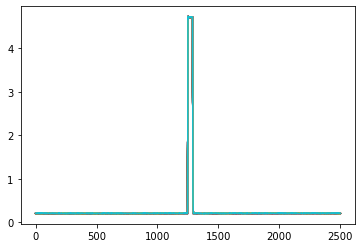

In [25]:
for trace in traces:
    plt.plot(trace)